
# Davis Club


Davis Southern Club Women

Shows how to make unipartite projections of the graph and compute the
properties of those graphs.

These data were collected by Davis et al. in the 1930s.
They represent observed attendance at 14 social events by 18 Southern women.
The graph is bipartite (clubs, women).



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bip
import pandas as pd

In [2]:
G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

### Explore and understand the data 

In [3]:
# project bipartite graph onto women nodes
Wp = bip.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (Wp.degree(w), w))


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


In [4]:
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bip.weighted_projected_graph(G, women)
print('')
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W.degree(w, weight='weight'), w))


#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


In [5]:
women
#list of all the women in the dataset

['Evelyn Jefferson',
 'Laura Mandeville',
 'Theresa Anderson',
 'Brenda Rogers',
 'Charlotte McDowd',
 'Frances Anderson',
 'Eleanor Nye',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Verne Sanderson',
 'Myra Liddel',
 'Katherina Rogers',
 'Sylvia Avondale',
 'Nora Fayette',
 'Helen Lloyd',
 'Dorothy Murchison',
 'Olivia Carleton',
 'Flora Price']

In [6]:
clubs
#list of all the events / clubs in the dataset

['E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14']

In [7]:
#lets examine one woman in the dataset
G['Charlotte McDowd']

AtlasView({'E5': {}, 'E4': {}, 'E7': {}, 'E3': {}})

Looks like Charlotte attended events E5, E4, E7 and E3

In [8]:
G['E4']

AtlasView({'Evelyn Jefferson': {}, 'Charlotte McDowd': {}, 'Theresa Anderson': {}, 'Brenda Rogers': {}})

Event E4 was attended by Evelyn, Charlotte, Theresea and Brenda

### Explore the Bipartite Presentation of the data

We divide the analysis into two sections 1) women are the primary nodes and 2) the events are the primary nodes

#### Women as primary nodes

In [9]:
print Wp['Charlotte McDowd']
print "Degrees"
print Wp.degree('Charlotte McDowd')

{'Theresa Anderson': {}, 'Helen Lloyd': {}, 'Nora Fayette': {}, 'Sylvia Avondale': {}, 'Verne Sanderson': {}, 'Brenda Rogers': {}, 'Eleanor Nye': {}, 'Frances Anderson': {}, 'Ruth DeSand': {}, 'Laura Mandeville': {}, 'Evelyn Jefferson': {}}
Degrees
11


In a projected graph representation Charlotte is connected to Theresa, Helen etc. In all 11 women. This means she has attended at least one event with each one of these women

In [10]:
# explore the weighted projected graph representation
W['Charlotte McDowd']

AtlasView({'Theresa Anderson': {'weight': 4}, 'Helen Lloyd': {'weight': 1}, 'Nora Fayette': {'weight': 1}, 'Sylvia Avondale': {'weight': 1}, 'Verne Sanderson': {'weight': 1}, 'Brenda Rogers': {'weight': 4}, 'Eleanor Nye': {'weight': 2}, 'Frances Anderson': {'weight': 2}, 'Ruth DeSand': {'weight': 2}, 'Laura Mandeville': {'weight': 3}, 'Evelyn Jefferson': {'weight': 3}})

In the weighted representation, it becomes clear who Charlotte attended the most events with. Theresa and Brenda were present at every event that Charlotte attended.   

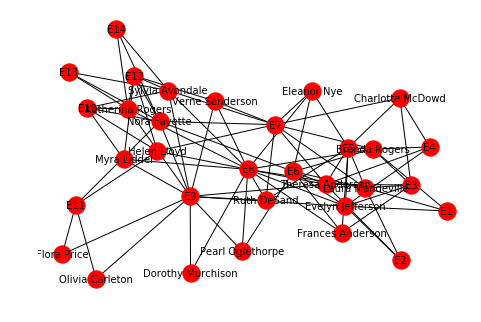

In [11]:
#draw the graph with the bi-partite respresentation
# both types of nodes are shown, i.e. women and the clubs
nx.draw(G,with_labels=True,font_size=10)

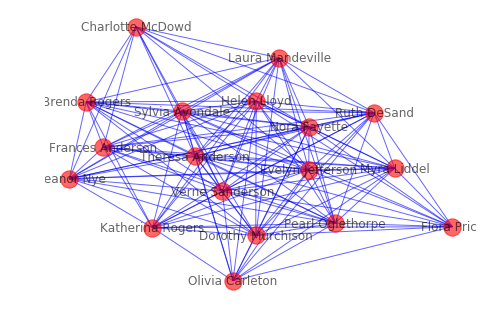

In [12]:
#draw the unweighted representation of the projected graph
nx.draw(Wp,with_labels=True,edge_color='b',alpha=0.6)

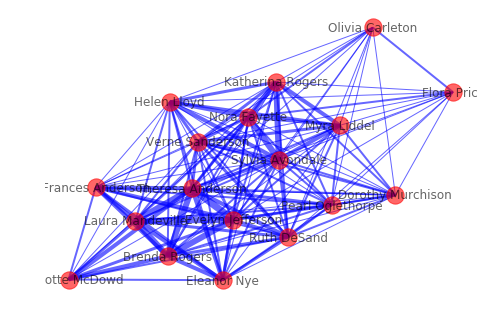

In [13]:
#show the weighted representation
edges = W.edges()
#colors = [W[u][v]['color'] for u,v in edges]
weights = [W[u][v]['weight'] for u,v in edges]
nx.draw(W,with_labels=True,edge_color='b',width=weights,alpha=0.6)

In [14]:
print "Weighted Projection"
print W.degree()
print "Unweighted Projection"
print Wp.degree()

Weighted Projection
[('Theresa Anderson', 17), ('Pearl Oglethorpe', 16), ('Flora Price', 12), ('Katherina Rogers', 16), ('Nora Fayette', 17), ('Sylvia Avondale', 17), ('Verne Sanderson', 17), ('Olivia Carleton', 12), ('Brenda Rogers', 15), ('Eleanor Nye', 15), ('Frances Anderson', 15), ('Dorothy Murchison', 16), ('Ruth DeSand', 17), ('Laura Mandeville', 15), ('Evelyn Jefferson', 17), ('Charlotte McDowd', 11), ('Myra Liddel', 16), ('Helen Lloyd', 17)]
Unweighted Projection
[('Theresa Anderson', 17), ('Pearl Oglethorpe', 16), ('Flora Price', 12), ('Katherina Rogers', 16), ('Nora Fayette', 17), ('Sylvia Avondale', 17), ('Verne Sanderson', 17), ('Olivia Carleton', 12), ('Brenda Rogers', 15), ('Eleanor Nye', 15), ('Frances Anderson', 15), ('Dorothy Murchison', 16), ('Ruth DeSand', 17), ('Laura Mandeville', 15), ('Evelyn Jefferson', 17), ('Charlotte McDowd', 11), ('Myra Liddel', 16), ('Helen Lloyd', 17)]


Theresa Anderson seems particularly interesting based on the above, she is connected to all the other women. We extract her ego graph below and analyze the results. 

Name: 
Type: Graph
Number of nodes: 26
Number of edges: 65
Average degree:   5.0000
Name: 
Type: Graph
Number of nodes: 18
Number of edges: 137
Average degree:  15.2222


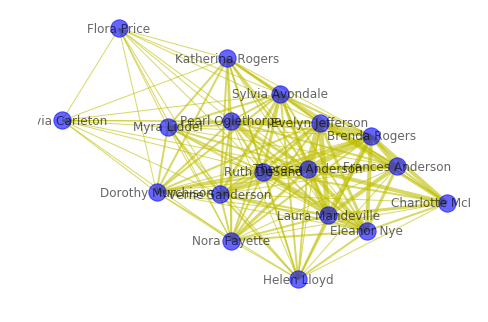

In [15]:
t_a=nx.ego_graph(G,'Theresa Anderson',radius=2)
t_b=bip.weighted_projected_graph(t_a, women)
t_edges= t_b.edges()
#colors = [W[u][v]['color'] for u,v in edges]
t_weights = [t_b[u][v]['weight'] for u,v in t_edges]
print nx.info(t_a)
print nx.info(t_b)
#nx.draw(t_b,with_labels=True)
nx.draw(t_b,with_labels=True,node_color='b',edge_color='y',width=t_weights,alpha=0.6)

In [16]:
#pd.DataFrame.from_dict(nx.degree_centrality(t_b))
w_cent=pd.DataFrame.from_dict(nx.degree_centrality(W),orient='index',columns=['Degree_Centrality'])
print "Degree Centrality for Projected Network"
w_cent.sort_values(by=['Degree_Centrality'],ascending=False)

Degree Centrality for Projected Network


,Degree_Centrality
Theresa Anderson,1.000000
Sylvia Avondale,1.000000
Ruth DeSand,1.000000
Evelyn Jefferson,1.000000
Verne Sanderson,1.000000
Helen Lloyd,1.000000
Nora Fayette,1.000000
Pearl Oglethorpe,0.941176
Dorothy Murchison,0.941176
Katherina Rogers,0.941176


In [17]:
#degree centrality for Theresa Anderson's network
ta_cent=pd.DataFrame.from_dict(nx.degree_centrality(t_b),orient='index',columns=['Degree_Centrality'])
print "Degree Centrality for Theresa Anderson"
ta_cent.sort_values(by=['Degree_Centrality'],ascending=False)

Degree Centrality for Theresa Anderson


,Degree_Centrality
Theresa Anderson,1.000000
Nora Fayette,1.000000
Sylvia Avondale,1.000000
Verne Sanderson,1.000000
Ruth DeSand,1.000000
Evelyn Jefferson,1.000000
Dorothy Murchison,0.941176
Myra Liddel,0.941176
Katherina Rogers,0.941176
Pearl Oglethorpe,0.941176


The degree centralities indicate that the most popular or most outgoing (as measured by event attendance) were Theresa, Nora, Sylvia, Verne, Ruth and Evelyn; while Olivia, Charlotte and Flora were the least popular

#### Events as primary nodes

In [18]:
# project bipartite graph onto clubs
#unweighted representation
Cp = bip.projected_graph(G, clubs)
#weighted representation
C=bip.weighted_projected_graph(G, clubs)

In [19]:
nx.info(Cp)

'Name: \nType: Graph\nNumber of nodes: 14\nNumber of edges: 66\nAverage degree:   9.4286'

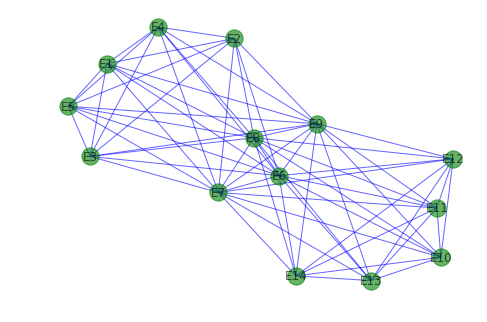

In [20]:
nx.draw(Cp,with_labels=True,node_color='g',edge_color='b',alpha=0.6)

In [21]:
#explore event e4 again
print Cp['E4']
print "degree"
print Cp.degree('E4')

{'E9': {}, 'E8': {}, 'E5': {}, 'E7': {}, 'E6': {}, 'E1': {}, 'E3': {}, 'E2': {}}
degree
8


At least one of the women who attend Event 4 (E4) also attended events E9, E8..etc

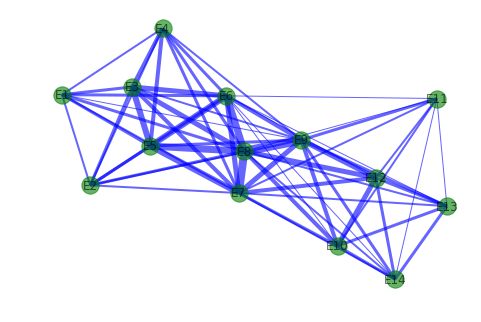

In [22]:
edges_c = C.edges()
#colors = [W[u][v]['color'] for u,v in edges]
weights_c = [C[u][v]['weight'] for u,v in edges_c]
nx.draw(C,with_labels=True,node_color='g',edge_color='b',width=weights_c,alpha=0.6)

In [23]:
print C['E4']

{'E9': {'weight': 2}, 'E8': {'weight': 3}, 'E5': {'weight': 4}, 'E7': {'weight': 3}, 'E6': {'weight': 3}, 'E1': {'weight': 2}, 'E3': {'weight': 4}, 'E2': {'weight': 2}}


As discussed above there were four women who attended event E4. The weighted graph indicates that of the 4 that attended E4, the four had reunions in event E5 and E3. 

In [24]:
def trim_edges(g,threshold):
    p=nx.Graph()
    for f,to,edata in g.edges(data=True):
        if edata['weight']>threshold:
            p.add_edge(f,to,weight=edata['weight'])
    return p

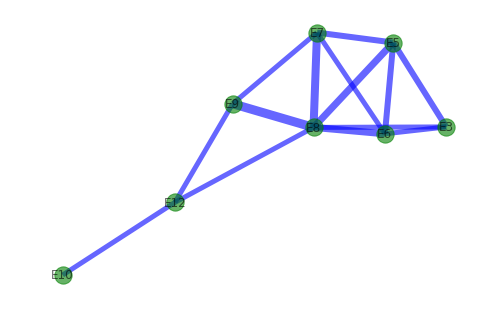

In [25]:
#the popular parties
p=trim_edges(C,4)
weights_p = [p[u][v]['weight'] for u,v in p.edges()]
nx.draw(p,with_labels=True,width=weights_p,node_color='g',edge_color='b',alpha=0.6)

Popular parties with 4 or more attendies are shown above

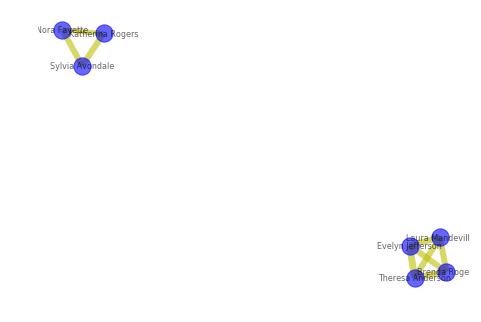

In [26]:
#the popular women
w_pop=trim_edges(W,4)
weights_p = [w_pop[u][v]['weight'] for u,v in w_pop.edges()]
nx.draw(w_pop,with_labels=True,width=weights_p,node_color='b',edge_color='y',alpha=0.6,font_size=8)

using the island method with women uncovers cliques. The cliques consist of Laura, Evelyn, Brenda and Theresa on the one hand and Nora, Sylvia and Katherina. Interestingly, a number of these women have degree centrality of 1. 